Gestational diabetes Mellitus

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import (roc_curve,auc,)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

Load the Dataset 

In [4]:
data = pd.read_csv("gestational_diabetes.csv")

In [5]:
data.head()

,GDM,AP,ICP,TD,Eclampsia,Twins,Day,Age,ALT,AST,...,TBA,UREA,CREA,UA,BMG,A1MG,CysC,CO2,FPG,BMI
0,0,0,0,0,0,0,119,29,12.900000,18.300000,...,2.500000,2.940000,50.50000,211.100000,1.340000,21.050000,0.700000,24.000000,5.410000,38.021780
1,0,0,0,0,0,0,165,30,19.267422,20.341909,...,1.593159,2.689873,67.27318,220.210738,0.952367,19.626514,0.640272,24.238539,4.708611,36.471451
2,0,0,0,0,0,0,85,35,16.800000,14.400000,...,1.600000,2.580000,50.50000,189.200000,0.870000,18.420000,0.500000,24.800000,5.290000,52.455713
3,0,0,0,0,0,0,134,36,19.267422,20.341909,...,1.593159,2.689873,67.27318,220.210738,0.952367,19.626514,0.640272,24.238539,4.708611,49.184689
4,0,0,0,0,0,0,77,32,11.900000,16.200000,...,1.300000,1.980000,43.90000,188.600000,0.840000,18.310000,0.600000,20.900000,5.100000,35.396311


In [6]:
# Generating the correlation matrix for the dataset
correlation_matrix = data.corr()

# Display the correlation matrix
correlation_matrix[["GDM"]].sort_values(by="GDM", ascending=False)

,GDM
GDM,1.000000
FPG,0.336054
Age,0.176754
A1MG,0.170393
UA,0.168533
GGT,0.147328
ALP,0.119582
BMG,0.077949
Eclampsia,0.063531
ICP,0.061228


In [7]:
features = ["AP", "ICP", "TD", "Eclampsia", "Age", "BMI","ALT", "AST", "GGT", "ALP", "TBA", "UREA", "CREA", "UA", "BMG","A1MG",
"CysC","FPG",]

X = data[features]

# Fit the scaler on training data
scaler = StandardScaler()
scaler.fit(X)

# Save the fitted scaler
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

Exploratory Analysis 

In [8]:
# Calculate summary statistics for the dataset
summary_statistics = X.describe()
summary_statistics

,AP,ICP,TD,Eclampsia,Age,BMI,ALT,AST,GGT,ALP,TBA,UREA,CREA,UA,BMG,A1MG,CysC,FPG
count,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000
mean,0.006316,0.003158,0.008070,0.010877,30.093333,37.842019,19.743378,20.434154,12.982186,46.255081,1.599224,2.691891,77.136003,223.582438,0.956633,19.847517,0.642055,4.778737
std,0.079228,0.056111,0.091419,0.103734,4.238510,11.696839,16.723825,8.777143,5.743534,11.728232,0.980101,0.544986,384.626181,37.925837,0.103748,2.458765,0.069266,0.395585
min,0.000000,0.000000,0.000000,0.000000,17.000000,17.638597,0.600000,8.300000,2.900000,11.600000,0.000000,1.050000,18.600000,93.700000,0.150000,0.720000,0.300000,2.840000
25%,0.000000,0.000000,0.000000,0.000000,27.000000,27.900273,12.000000,16.700000,10.500000,43.100000,1.400000,2.420000,41.200000,213.975000,0.952367,19.626514,0.640272,4.630000
50%,0.000000,0.000000,0.000000,0.000000,30.000000,37.861396,19.267422,20.341909,12.535816,45.515259,1.593159,2.689873,54.250000,220.210738,0.952367,19.626514,0.640272,4.708611
75%,0.000000,0.000000,0.000000,0.000000,32.000000,47.938886,21.100000,20.765597,14.200000,48.913311,1.621019,2.790000,67.273180,235.697195,0.971961,20.641597,0.648459,4.980000
max,1.000000,1.000000,2.000000,1.000000,47.000000,58.042632,310.700000,194.400000,105.400000,220.900000,24.700000,8.140000,12024.100000,550.500000,2.510000,48.730000,1.700000,11.950000


Data cleaning 

In [9]:
y = data["GDM"]

Number of Columns and rows in the dataset 

In [10]:
data.shape

(5700, 26)

Getting the stastical measures of the data 

In [11]:
data.describe()

,GDM,AP,ICP,TD,Eclampsia,Twins,Day,Age,ALT,AST,...,TBA,UREA,CREA,UA,BMG,A1MG,CysC,CO2,FPG,BMI
count,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,...,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000
mean,0.217719,0.006316,0.003158,0.008070,0.010877,0.019649,109.962632,30.093333,19.743378,20.434154,...,1.599224,2.691891,77.136003,223.582438,0.956633,19.847517,0.642055,24.238442,4.778737,37.842019
std,0.412732,0.079228,0.056111,0.091419,0.103734,0.138804,39.261339,4.238510,16.723825,8.777143,...,0.980101,0.544986,384.626181,37.925837,0.103748,2.458765,0.069266,1.374203,0.395585,11.696839
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.600000,8.300000,...,0.000000,1.050000,18.600000,93.700000,0.150000,0.720000,0.300000,15.600000,2.840000,17.638597
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,27.000000,12.000000,16.700000,...,1.400000,2.420000,41.200000,213.975000,0.952367,19.626514,0.640272,24.238095,4.630000,27.900273
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,30.000000,19.267422,20.341909,...,1.593159,2.689873,54.250000,220.210738,0.952367,19.626514,0.640272,24.238539,4.708611,37.861396
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,32.000000,21.100000,20.765597,...,1.621019,2.790000,67.273180,235.697195,0.971961,20.641597,0.648459,24.238539,4.980000,47.938886
max,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,167.000000,47.000000,310.700000,194.400000,...,24.700000,8.140000,12024.100000,550.500000,2.510000,48.730000,1.700000,33.000000,11.950000,58.042632


In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Support Vector Machine

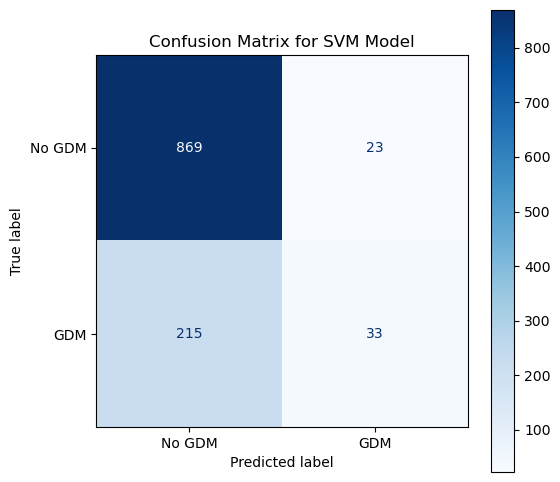

'              precision    recall  f1-score   support\n\n           0       0.80      0.97      0.88       892\n           1       0.59      0.13      0.22       248\n\n    accuracy                           0.79      1140\n   macro avg       0.70      0.55      0.55      1140\nweighted avg       0.76      0.79      0.74      1140\n'

In [14]:
from sklearn.svm import SVC


# Initialize and train the SVM model
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["No GDM", "GDM"]
)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
cm_display.plot(ax=ax, cmap="Blues")
plt.title("Confusion Matrix for SVM Model")
plt.show()

# Displaying the classification report
report = classification_report(y_test, y_pred)

report

In [15]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7912280701754386

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the features to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train an SVM model on the PCA-transformed data
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train_pca, y_train)

# Plotting decision boundary and scatter plot
# Create a mesh to plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1.0), np.arange(y_min, y_max, 1.0))

# Predict on each point in the mesh
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Scatter plot of training points in the PCA space
scatter = plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=y_train,
    cmap=plt.cm.coolwarm,
    edgecolor="k",
    s=20,
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary on PCA-Reduced Data")

# Add a legend
legend_labels = ["No GDM", "GDM"]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

# Show the plot
plt.show()

Random Forest Classifier

In [ ]:
# Set up the parameter grid to tune hyperparameters
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees in the forest
    "max_depth": [10, 20, 30],  # Maximum depth of each tree
    "min_samples_split": [2, 5, 10,],  # Minimum number of samples required to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum number of samples required in a leaf node
    "max_features": ["sqrt","log2",],  # Number of features to consider when looking for the best split
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring="accuracy"
)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on test set using the best estimator
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Train the model with the best hyperparameters
best_rf = RandomForestClassifier(
    max_depth=30,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42,
)

# Fit the model on the training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy on Test Set: 0.95
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       892
           1       0.99      0.78      0.87       248

    accuracy                           0.95      1140
   macro avg       0.97      0.89      0.92      1140
weighted avg       0.95      0.95      0.95      1140



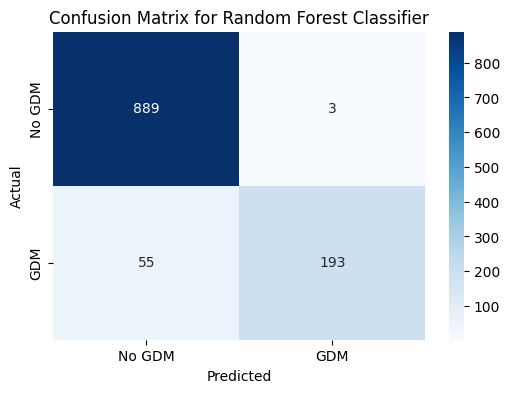

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No GDM", "GDM"],
    yticklabels=["No GDM", "GDM"],
)

plt.title("Confusion Matrix for Random Forest Classifier")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

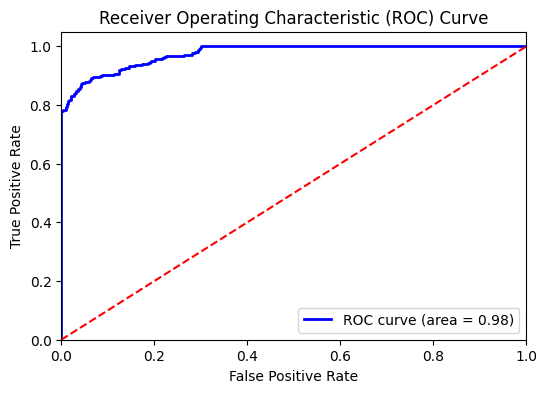

In [ ]:
from sklearn.metrics import  roc_curve, auc

# ROC Curve
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  # Get predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Logistic Regression

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the features to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Logistic Regression model on the PCA-transformed data
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_pca, y_train)

# Print Accuracy and Classification Report for Logistic Regression
y_pred_log = log_model.predict(X_test_pca)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report - Logistic Regression:\n",
    classification_report(y_test, y_pred_log),
)

Logistic Regression Accuracy: 0.7763157894736842
Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.78      0.99      0.87       892
           1       0.29      0.02      0.04       248

    accuracy                           0.78      1140
   macro avg       0.54      0.50      0.46      1140
weighted avg       0.68      0.78      0.69      1140



In [ ]:
print("Confusion Matrix - Logistic Regression:\n", confusion_matrix(y_test, y_pred_log))

Confusion Matrix - Logistic Regression:
 [[880  12]
 [243   5]]


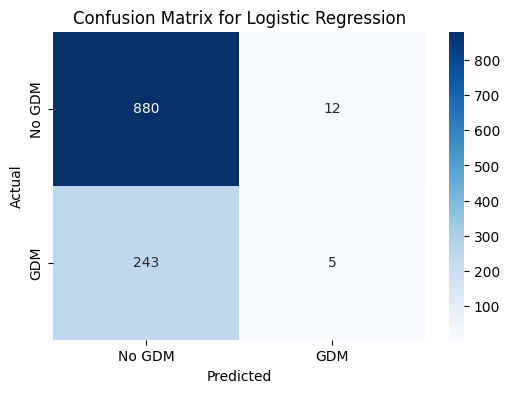

In [ ]:
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_log,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No GDM", "GDM"],
    yticklabels=["No GDM", "GDM"],
)

plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

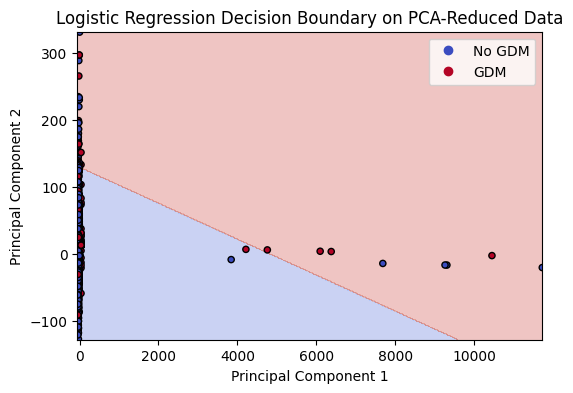

In [ ]:
# Define a larger step size for the mesh grid to reduce memory usage
step_size = 1.0  # Adjust this step size if necessary

# Create a mesh to plot the decision boundary with a larger step size
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size)
)

# Predict on each point in the mesh
Z = log_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(6,4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Scatter plot of training points in the PCA space
scatter = plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=y_train,
    cmap=plt.cm.coolwarm,
    edgecolor="k",
    s=20,
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Logistic Regression Decision Boundary on PCA-Reduced Data")

# Add a legend
legend_labels = ["No GDM", "GDM"]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

# Show the plot
plt.show()

MLP Classifier

In [ ]:
# Initialize lists to store accuracy values and epochs
accuracy_scores = []
epochs = list(range(1, 301, 10))  # Range of epochs to evaluate

# Train and evaluate MLP for different epoch values
for epoch in epochs:
    # Initialize the MLPClassifier with a varying max_iter value
    mlp_model = MLPClassifier(
        hidden_layer_sizes=(100, 50),
        max_iter=epoch,
        random_state=42,
        learning_rate_init=0.001,
    )
    mlp_model.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = mlp_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)



# Print Accuracy and Classification Report for MLPClassifier

print("MLPClassifier Accuracy:", accuracy_score(y_test, y_pred))
print(

    "Classification Report - MLPClassifier:\n",
    classification_report(y_test, y_pred),
)

c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (21) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier Accuracy: 0.8912280701754386
Classification Report - MLPClassifier:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       892
           1       0.98      0.51      0.67       248

    accuracy                           0.89      1140
   macro avg       0.93      0.75      0.80      1140
weighted avg       0.90      0.89      0.88      1140



In [ ]:
print("Confusion Matrix - MLPClassifier:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix - MLPClassifier:
 [[889   3]
 [121 127]]


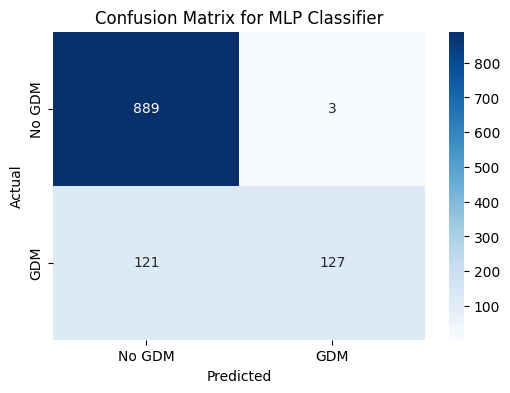

In [ ]:
cm_mlp = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_mlp,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No GDM", "GDM"],
    yticklabels=["No GDM", "GDM"],
)

plt.title("Confusion Matrix for MLP Classifier")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

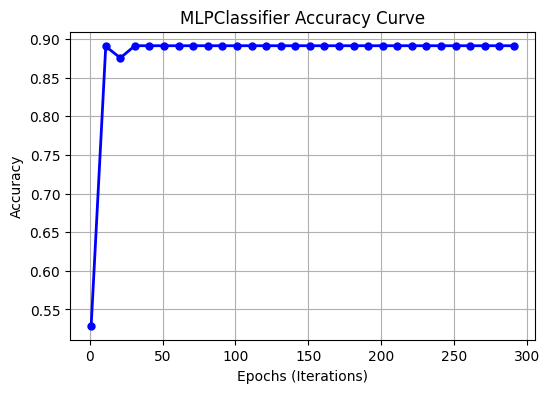

In [ ]:
# Plotting the accuracy curve
plt.figure(figsize=(6, 4))
plt.plot(
    epochs,
    accuracy_scores,
    marker="o",
    color="b",
    linestyle="-",
    linewidth=2,
    markersize=5,
)
plt.title("MLPClassifier Accuracy Curve")
plt.xlabel("Epochs (Iterations)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

Using Deep Learning

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=75,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
)

Epoch 1/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7087 - loss: 0.5885 - val_accuracy: 0.8465 - val_loss: 0.4210
Epoch 2/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8547 - loss: 0.4229 - val_accuracy: 0.8564 - val_loss: 0.3966
Epoch 3/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8575 - loss: 0.3878 - val_accuracy: 0.8575 - val_loss: 0.3874
Epoch 4/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8682 - loss: 0.3795 - val_accuracy: 0.8618 - val_loss: 0.3795
Epoch 5/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8726 - loss: 0.3530 - val_accuracy: 0.8651 - val_loss: 0.3723
Epoch 6/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8815 - loss: 0.3284 - val_accuracy: 0.8586 - val_loss: 0.3640
Epoch 7/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8820 - loss: 0.3204 - val_accuracy: 0.8640 - val_loss: 0.3490
Epoch 8/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8969 - loss: 0.2850 - val_accuracy: 0

In [ ]:
#Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9082 - loss: 0.2476
Test Accuracy: 0.9123


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


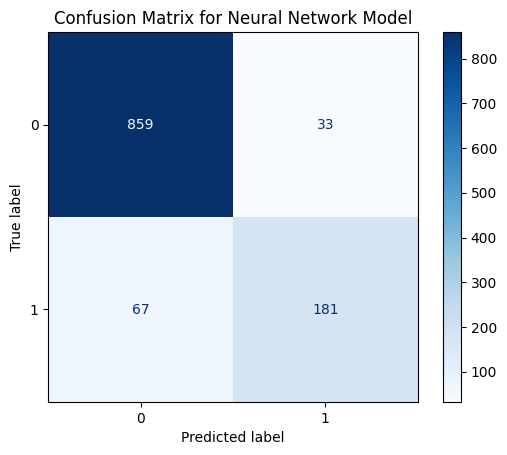

In [ ]:
# Predict on the test data
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(
    "int32"
)  # Convert probabilities to class labels (0 or 1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Neural Network Model")
plt.show()

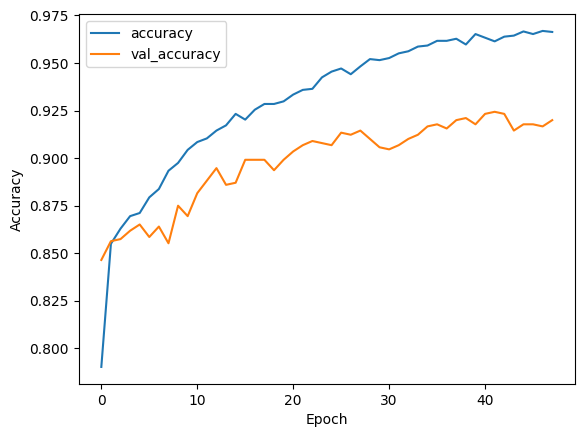

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

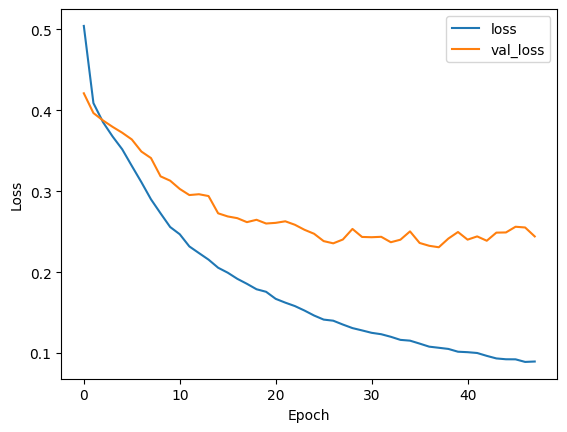

In [ ]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# After training the model, save it to a file
model.save("gdm_model.h5")